In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', #mostly controls relative sizes of things on plot 
                        #The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”
        style = 'darkgrid', #dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        palette = 'deep', # Should be something that color_palette() can process.
        font_scale = 1, 
        color_codes = False, 
        rc = None)

#from IPython.core.interactiveshell import InteractiveShell 
#InteractiveShell.ast_node_interactivity = 'last_expr' 
#setting = "all" allows multiple outputs to be displayed for a given input cell. don't use w plotting!

from IPython.display import display

%matplotlib notebook
#%matplotlib inline

pd.__version__ , np.__version__ #,  matplotlib.__version__, sns.__version__

('0.23.3', '1.14.2')

In [2]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, KFold, StratifiedKFold, \
                                    ShuffleSplit, GridSearchCV, RandomizedSearchCV, cross_val_predict

from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier

from sklearn.externals import joblib

In [3]:
pwd

'/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk/level_1_ensembling'

In [4]:
% cd '/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk/'

/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk


In [5]:
from Home_Credit_package.master_pipeline import master_pipeline
from Home_Credit_package.Dons_functions import balanced_sample

In [6]:
pwd

'/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk'

In [7]:
model_save_path = 'saved_models/level_1_models/'

# load this

## load df

In [8]:
from functools import reduce

path = 'wrangling/TRAINING_DATA_create_final_wrangled_csv/'
total_df = pd.read_csv(path + 'complete_initial_wrangled_data.csv', index_col = 'SK_ID_CURR')

In [9]:
total_df.info(verbose = True, null_counts = True);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 86 columns):
TARGET                               307511 non-null int64
NAME_CONTRACT_TYPE                   307511 non-null object
CODE_GENDER                          307511 non-null object
FLAG_OWN_CAR                         307511 non-null object
FLAG_OWN_REALTY                      307511 non-null object
CNT_CHILDREN                         307511 non-null int64
NAME_EDUCATION_TYPE                  307511 non-null object
NAME_FAMILY_STATUS                   307511 non-null object
DAYS_BIRTH                           307511 non-null int64
FLAG_EMP_PHONE                       307511 non-null int64
FLAG_WORK_PHONE                      307511 non-null int64
FLAG_PHONE                           307511 non-null int64
FLAG_EMAIL                           307511 non-null int64
CNT_FAM_MEMBERS                      307511 non-null int64
REGION_RATING_CLIENT                 307511 non-null

In [10]:
# CHECK: this should be empty if everything is non null
total_df.isnull().any()[total_df.isnull().any()==True]

Series([], dtype: bool)

# new models to run

In [11]:
raw_level_1_new_features_df = pd.DataFrame(total_df.index)
raw_level_1_new_features_df.set_index('SK_ID_CURR', inplace=True)

### random forest random, EXT sources, with poly interactions

In [12]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = total_df[['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']],
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']
                )

Total original feat len is 3. Sum of feats is 3.
Final array is length 35. final feature list is length 35.


In [13]:
my_StrKFold = StratifiedKFold(n_splits = 3, 
                              shuffle = True,
                              random_state = 0)

my_folds = my_StrKFold.split(total_df, total_df['TARGET'])

param_dist_dict =  {'max_depth': 7,
                     'min_samples_leaf': 10,
                     'min_samples_split': 2,
                     'n_estimators': 50}

forest_reg = RandomForestClassifier(random_state=0,
                                    class_weight = None,
                                    **param_dist_dict,
                                    #verbose = 51
                                   )

cross_val_preds = cross_val_predict(estimator = forest_reg, 
                                      X = total_df_piped,
                                      y = total_df['TARGET'], 
                                      groups = None,
                                      cv = my_folds,
                                      n_jobs = -1,
                                      verbose = 51,
                                      fit_params = None, 
                                      pre_dispatch = '2*n_jobs', 
                                      method = 'predict_proba')

Memmaping (shape=(307511, 35), dtype=float64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4491624008/10637-112175649680-b9484bf6bcb51c1aa31120baddc95076.pkl
Memmaping (shape=(307511,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4491624008/10637-112175649680-7fee98903a11851f0c36b343c7ef5338.pkl
Memmaping (shape=(205007,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4491624008/10637-112175649680-617b94b8ee1dd73b53ff7a38ec2f741c.pkl
Memmaping (shape=(205007,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4491624008/10637-112175649680-49dd99a20eff7bff76798131d715d7ea.pkl
Memmaping (shape=(205008,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4491624008/10637-112175649680-20227521c910aa39c9819320f3625345.pkl
[Parallel(

In [14]:
val_scores = [x[1]for x in cross_val_preds]

In [15]:
raw_level_1_new_features_df['RanFor_EXTpoly'] = val_scores

In [16]:
roc_auc_score(total_df['TARGET'], val_scores)

0.7254847039583217

In [17]:
# fit and save model for predictions
forest_reg.fit(X = total_df_piped,
               y = total_df['TARGET'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
joblib.dump(forest_reg, model_save_path + 'RanFor_EXTpoly_level_1.joblib')

['saved_models/level_1_models/RanFor_EXTpoly_level_1.joblib']

### random forest, all features

In [19]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = total_df,
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=[]
                )

Total original feat len is 85. Sum of feats is 85.
Final array is length 418. final feature list is length 418.


In [20]:
my_StrKFold = StratifiedKFold(n_splits = 3, 
                              shuffle = True,
                              random_state = 0)

my_folds = my_StrKFold.split(total_df, total_df['TARGET'])

param_dist_dict =  {'max_depth': 15,
                     'min_samples_leaf': 63,
                     'min_samples_split': 2,
                     'n_estimators': 40}

forest_reg = RandomForestClassifier(random_state=0,
                                    class_weight = None,
                                   **param_dist_dict, 
                                 #  verbose = 51, 
                                 #  n_jobs = -1
                                   )

cross_val_preds = cross_val_predict(estimator = forest_reg, 
                                      X = total_df_piped,
                                      y = total_df['TARGET'], 
                                      groups = None,
                                      cv = my_folds,
                                      n_jobs = -1,
                                      verbose = 51,
                                      fit_params = None, 
                                      pre_dispatch = '2*n_jobs', 
                                      method = 'predict_proba')

Memmaping (shape=(73187618,), dtype=int32) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112175648952/10637-112180294880-944bb81dc33d1a337714af8a3d3ab012.pkl
Memmaping (shape=(307512,), dtype=int32) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112175648952/10637-112180294880-851f25297a32c2e0d1a0ef9235730f5f.pkl
Memmaping (shape=(73187618,), dtype=float64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112175648952/10637-112180294880-5f766c0f99bba322f54619d7700cf8ee.pkl
Memmaping (shape=(307511,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112175648952/10637-112180294880-7fee98903a11851f0c36b343c7ef5338.pkl
Memmaping (shape=(205007,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112175648952/10637-112180294880-617b94b8ee1dd73b53ff7a38ec2f741c.pkl

In [21]:
val_scores = [x[1]for x in cross_val_preds]

raw_level_1_new_features_df['RanFor_AllFeats'] = val_scores

In [22]:
roc_auc_score(total_df['TARGET'],val_scores)

0.7490073680262378

In [23]:
# fit and save model for predictions
forest_reg.fit(X = total_df_piped,
               y = total_df['TARGET'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=63, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
joblib.dump(forest_reg, model_save_path + 'RanFor_AllFeats_level_1.joblib')

['saved_models/level_1_models/RanFor_AllFeats_level_1.joblib']

### log reg, on EXT sources with poly interactions

In [25]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = total_df[['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']],
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']
                )

Total original feat len is 3. Sum of feats is 3.
Final array is length 35. final feature list is length 35.


In [26]:
my_StrKFold = StratifiedKFold(n_splits = 3, 
                              shuffle = True,
                              random_state = 0)

my_folds = my_StrKFold.split(total_df, total_df['TARGET'])

my_LgRg = LogisticRegression(penalty= 'l2', 
                            random_state = 0, 
                            class_weight = None, 
                            C = 30.5,
                          #  verbose = 51
                            ) 

cross_val_preds = cross_val_predict(estimator = my_LgRg, 
                                      X = total_df_piped,
                                      y = total_df['TARGET'], 
                                      groups = None,
                                      cv = my_folds,
                                      n_jobs = -1,
                                      verbose = 51,
                                      fit_params = None, 
                                      pre_dispatch = '2*n_jobs', 
                                      method = 'predict_proba')

Memmaping (shape=(307511, 35), dtype=float64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112180294488/10637-112180382632-b9484bf6bcb51c1aa31120baddc95076.pkl
Memmaping (shape=(307511,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112180294488/10637-112180382632-7fee98903a11851f0c36b343c7ef5338.pkl
Memmaping (shape=(205007,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112180294488/10637-112180382632-617b94b8ee1dd73b53ff7a38ec2f741c.pkl
Memmaping (shape=(205007,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112180294488/10637-112180382632-49dd99a20eff7bff76798131d715d7ea.pkl
Memmaping (shape=(205008,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112180294488/10637-112180382632-20227521c910aa39c9819320f3625345.pkl


In [27]:
val_scores = [x[1]for x in cross_val_preds]

raw_level_1_new_features_df['LogReg_EXTpoly'] = val_scores

In [28]:
roc_auc_score(total_df['TARGET'],val_scores)

0.7254526622434527

In [29]:
# fit and save model for predictions
my_LgRg.fit(X = total_df_piped,
            y = total_df['TARGET'])

LogisticRegression(C=30.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
joblib.dump(my_LgRg, model_save_path + 'LogReg_EXTpoly_level_1.joblib')

['saved_models/level_1_models/LogReg_EXTpoly_level_1.joblib']

###  log reg, on all features

In [31]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = total_df,
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=[]
                )

Total original feat len is 85. Sum of feats is 85.
Final array is length 418. final feature list is length 418.


In [32]:
my_StrKFold = StratifiedKFold(n_splits = 3, 
                              shuffle = True,
                              random_state = 0)

my_folds = my_StrKFold.split(total_df, total_df['TARGET'])

my_LgRg = LogisticRegression(penalty= 'l2', 
                            random_state = 0, 
                            class_weight = None,
                            C = 5.5,
                          #  verbose = 51
                            ) 

cross_val_preds = cross_val_predict(estimator = my_LgRg, 
                                      X = total_df_piped,
                                      y = total_df['TARGET'], 
                                      groups = None,
                                      cv = my_folds,
                                      n_jobs = -1,
                                      verbose = 51,
                                      fit_params = None, 
                                      pre_dispatch = '2*n_jobs', 
                                      method = 'predict_proba')

Memmaping (shape=(73187618,), dtype=int32) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4479337416/10637-112180360304-944bb81dc33d1a337714af8a3d3ab012.pkl
Memmaping (shape=(307512,), dtype=int32) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4479337416/10637-112180360304-851f25297a32c2e0d1a0ef9235730f5f.pkl
Memmaping (shape=(73187618,), dtype=float64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4479337416/10637-112180360304-5f766c0f99bba322f54619d7700cf8ee.pkl
Memmaping (shape=(307511,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4479337416/10637-112180360304-7fee98903a11851f0c36b343c7ef5338.pkl
Memmaping (shape=(205007,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_4479337416/10637-112180360304-617b94b8ee1dd73b53ff7a38ec2f741c.pkl
Memmaping

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 23.7min


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 32.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 32.3min finished


In [33]:
val_scores = [x[1]for x in cross_val_preds]

raw_level_1_new_features_df['LogReg_AllFeats'] = val_scores

In [34]:
roc_auc_score(total_df['TARGET'],val_scores)

0.7677839227336094

In [35]:
# fit and save model for predictions
my_LgRg.fit(X = total_df_piped,
            y = total_df['TARGET'])

LogisticRegression(C=5.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
joblib.dump(my_LgRg, model_save_path + 'LogReg_AllFeats_level_1.joblib')

['saved_models/level_1_models/LogReg_AllFeats_level_1.joblib']

### MLP Classifier, all features. 

In [37]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = total_df,
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=[]
                )

Total original feat len is 85. Sum of feats is 85.
Final array is length 418. final feature list is length 418.


In [38]:
my_StrKFold = StratifiedKFold(n_splits = 3, 
                              shuffle = True,
                              random_state = 0)

my_folds = my_StrKFold.split(total_df, total_df['TARGET'])

param_dist_dict =  {'alpha': 0.35, 'hidden_layer_sizes': (100,)}

my_MLP = MLPClassifier(random_state=0, 
                       tol=0.0001, 
                       warm_start=False, 
                       momentum=0.9,
                      **param_dist_dict, 
                     # verbose = 51
                      )

cross_val_preds = cross_val_predict(estimator = my_MLP, 
                                      X = total_df_piped,
                                      y = total_df['TARGET'], 
                                      groups = None,
                                      cv = my_folds,
                                      n_jobs = -1,
                                      verbose = 51,
                                      fit_params = None, 
                                      pre_dispatch = '2*n_jobs', 
                                      method = 'predict_proba')

Memmaping (shape=(73187618,), dtype=int32) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112165433128/10637-112180361760-944bb81dc33d1a337714af8a3d3ab012.pkl
Memmaping (shape=(307512,), dtype=int32) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112165433128/10637-112180361760-851f25297a32c2e0d1a0ef9235730f5f.pkl
Memmaping (shape=(73187618,), dtype=float64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112165433128/10637-112180361760-5f766c0f99bba322f54619d7700cf8ee.pkl
Memmaping (shape=(307511,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112165433128/10637-112180361760-7fee98903a11851f0c36b343c7ef5338.pkl
Memmaping (shape=(205007,), dtype=int64) to new file /var/folders/1x/nd476hm95310c4gp98rmvwkc0000gn/T/joblib_memmaping_pool_10637_112165433128/10637-112180361760-617b94b8ee1dd73b53ff7a38ec2f741c.pkl

In [39]:
val_scores = [x[1]for x in cross_val_preds]

raw_level_1_new_features_df['MLP_AllFeats'] = val_scores

In [40]:
roc_auc_score(total_df['TARGET'],val_scores)

0.7597744093473513

In [41]:
# fit and save model for predictions
my_MLP.fit(X = total_df_piped,
           y = total_df['TARGET'])

MLPClassifier(activation='relu', alpha=0.35, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [42]:
joblib.dump(my_MLP, model_save_path + 'MLP_AllFeats_level_1.joblib')

['saved_models/level_1_models/MLP_AllFeats_level_1.joblib']

# Plot so far 

In [43]:
just_for_plotting_df = pd.merge(total_df, raw_level_1_new_features_df, left_index=True, right_index= True, how = 'inner') #on='SK_ID_CURR' )

In [44]:
#check shapes 
total_df.shape, raw_level_1_new_features_df.shape, just_for_plotting_df.shape

((307511, 86), (307511, 5), (307511, 91))

## log mod trans

In [45]:
def log_modulus_transformation(x):
    return np.sign(x)*np.log10( np.abs(x)+1)

In [46]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(just_for_plotting_df, 24000, 0)

In [47]:
my_list = ['RanFor_EXTpoly', 'RanFor_AllFeats', 'LogReg_EXTpoly',
       'LogReg_AllFeats', 'MLP_AllFeats']

for f in my_list:
    this_sample['LogMod_' + f] = log_modulus_transformation(this_sample[f])

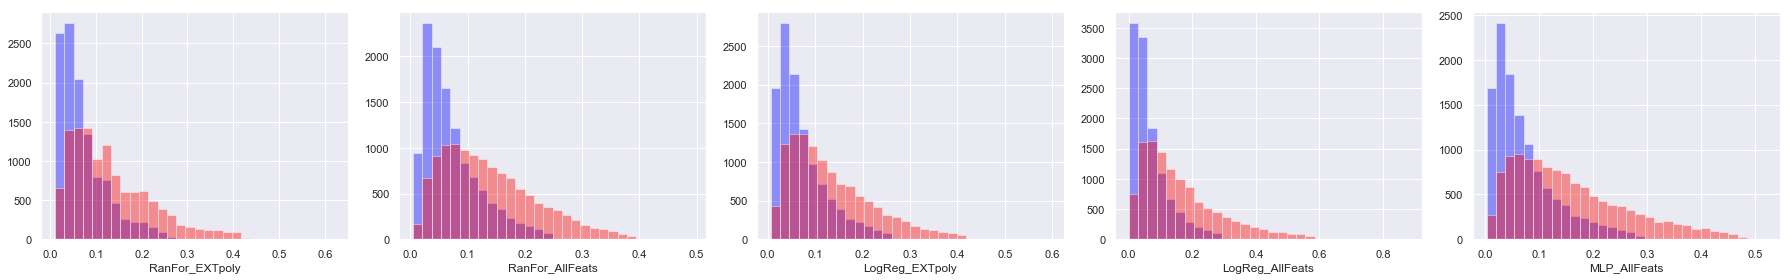

In [48]:
# PLOT 

my_list = ['RanFor_EXTpoly', 'RanFor_AllFeats', 'LogReg_EXTpoly',
       'LogReg_AllFeats', 'MLP_AllFeats']

num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):
    
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]
    
    #keep data within 3 SDs of mean
    dat_0 = dat_0[~((dat_0-dat_0.mean()).abs() > 3*dat_0.std())]
    dat_1 = dat_1[~((dat_1-dat_1.mean()).abs() > 3*dat_1.std())]
    
#     #divv = 40
#     bw_0 = np.std(dat_0)/3
#     bw_1 = np.std(dat_1)/3
    
    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] #, 'fd'
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)#, bw =bw_0) #( abs(max(dat_0)- min(dat_0))/divv   ) )#, bw = 90000)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a],kde = False, bins = my_bins)#, bw =bw_1) #( abs(max(dat_0)- min(dat_0))/divv       ) )#,   ) #, bw = 90000)
    
#     if f =='AMT_CREDIT_SUM_max':
#         #g1.set_ylim(10**4.3, 10**7)
#         g1.set_xlim(1, 10**7)
    
   # g0.set_xticklabels(g.get_xticklabels(),rotation = 80)

plt.tight_layout()

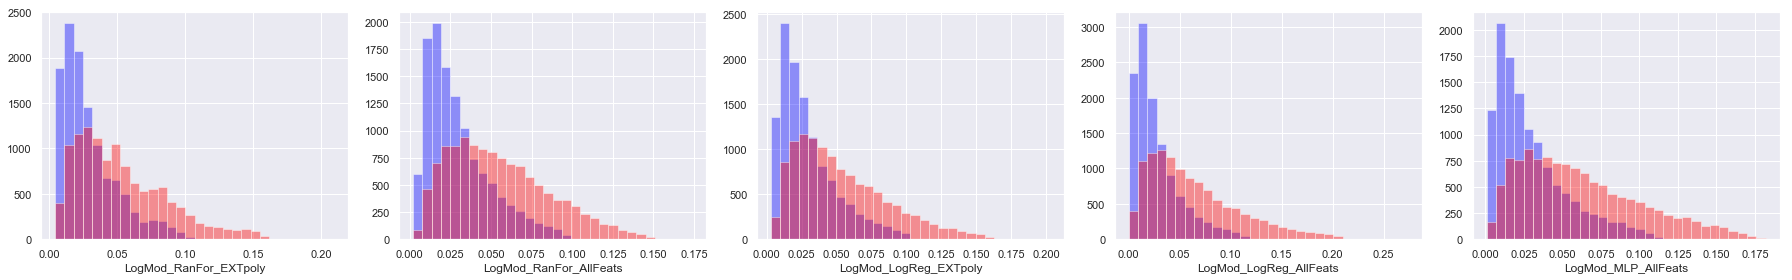

In [49]:
# PLOT 

my_list  =  my_list = ['LogMod_RanFor_EXTpoly', 'LogMod_RanFor_AllFeats', 'LogMod_LogReg_EXTpoly',
               'LogMod_LogReg_AllFeats', 'LogMod_MLP_AllFeats']

num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):
    
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]
    
    #keep data within 3 SDs of mean
    dat_0 = dat_0[~((dat_0-dat_0.mean()).abs() > 3*dat_0.std())]
    dat_1 = dat_1[~((dat_1-dat_1.mean()).abs() > 3*dat_1.std())]
    
#     #divv = 40
#     bw_0 = np.std(dat_0)/3
#     bw_1 = np.std(dat_1)/3
    
    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] #, 'fd'
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)#, bw =bw_0) #( abs(max(dat_0)- min(dat_0))/divv   ) )#, bw = 90000)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a],kde = False, bins = my_bins)#, bw =bw_1) #( abs(max(dat_0)- min(dat_0))/divv       ) )#,   ) #, bw = 90000)
    
#     if f =='AMT_CREDIT_SUM_max':
#         #g1.set_ylim(10**4.3, 10**7)
#         g1.set_xlim(1, 10**7)
    
   # g0.set_xticklabels(g.get_xticklabels(),rotation = 80)

plt.tight_layout()

## pwr transformations

In [50]:
['RanFor_EXTpoly', 'RanFor_AllFeats', 'LogReg_AllFeats',
 'LogReg_EXTpoly', 'MLP_AllFeats']

['RanFor_EXTpoly',
 'RanFor_AllFeats',
 'LogReg_AllFeats',
 'LogReg_EXTpoly',
 'MLP_AllFeats']

In [51]:
# get a random sample bc full sample is too much to plot
this_sample = balanced_sample(just_for_plotting_df, 24000, 0)

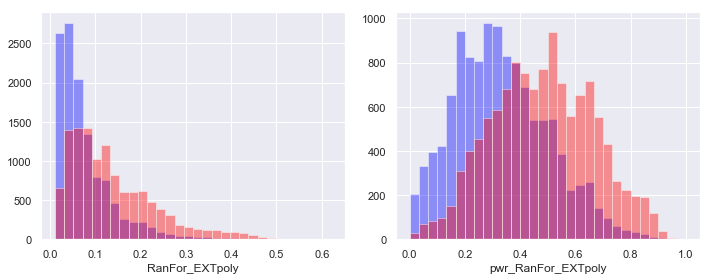

In [52]:
feat = 'RanFor_EXTpoly'
#this_sample['LogMod_'+ feat] = log_modulus_transformation(this_sample[feat])
this_sample['pwr_'+ feat] = (+this_sample[feat])**(1/5)
this_sample['pwr_'+ feat] = \
(this_sample['pwr_'+ feat] - min(this_sample['pwr_'+ feat])) /( max(this_sample['pwr_'+ feat]) - min(this_sample['pwr_'+ feat]))

my_list = [feat,  'pwr_'+ feat] # 'LogMod_'+feat,
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):   
    dat_0 = this_sample[ (this_sample['TARGET']== 0) ][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) ][f]

    my_bins =np.histogram(  this_sample[f]  , bins = 30 )[1] 
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)
    
plt.tight_layout()

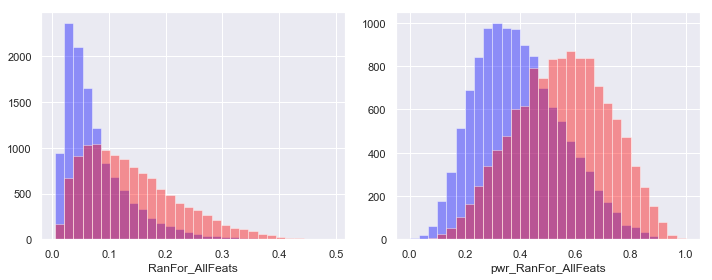

In [53]:
feat = 'RanFor_AllFeats'
#this_sample['LogMod_'+ feat] = log_modulus_transformation(this_sample[feat])
this_sample['pwr_'+ feat] = (+this_sample[feat])**(1/3.5)
this_sample['pwr_'+ feat] = \
(this_sample['pwr_'+ feat] - min(this_sample['pwr_'+ feat])) /( max(this_sample['pwr_'+ feat]) - min(this_sample['pwr_'+ feat]))

my_list = [feat,  'pwr_'+ feat] # 'LogMod_'+feat,
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):   
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]

    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] 
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)
    
plt.tight_layout()

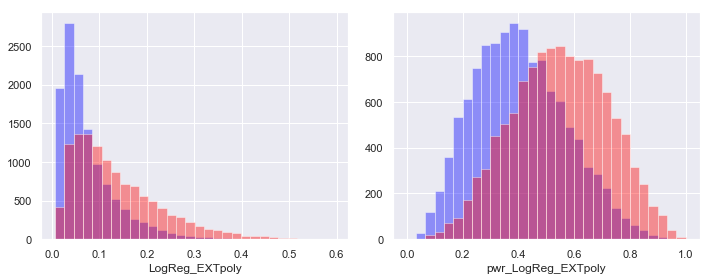

In [54]:
feat = 'LogReg_EXTpoly'
#this_sample['LogMod_'+ feat] = log_modulus_transformation(this_sample[feat])
this_sample['pwr_'+ feat] = (+this_sample[feat])**(1/7)
this_sample['pwr_'+ feat] = \
(this_sample['pwr_'+ feat] - min(this_sample['pwr_'+ feat])) /( max(this_sample['pwr_'+ feat]) - min(this_sample['pwr_'+ feat]))

my_list = [feat,  'pwr_'+ feat] # 'LogMod_'+feat,
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):   
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]

    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] 
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)
    
plt.tight_layout()

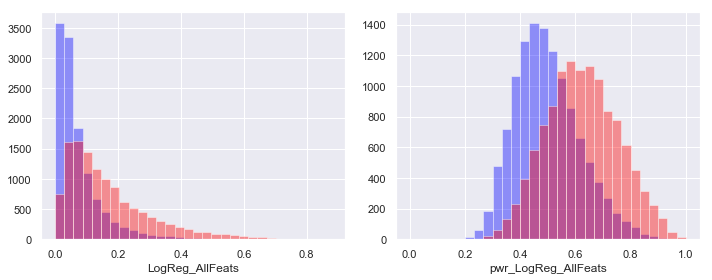

In [55]:
feat = 'LogReg_AllFeats'
#this_sample['LogMod_'+ feat] = log_modulus_transformation(this_sample[feat])
this_sample['pwr_'+ feat] = (+this_sample[feat])**(1/4)
this_sample['pwr_'+ feat] = \
(this_sample['pwr_'+ feat] - min(this_sample['pwr_'+ feat])) /( max(this_sample['pwr_'+ feat]) - min(this_sample['pwr_'+ feat]))

my_list = [feat,  'pwr_'+ feat] # 'LogMod_'+feat,
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):   
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]

    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] 
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)
    
plt.tight_layout()

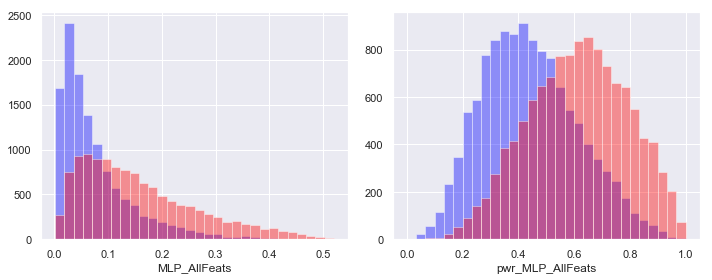

In [56]:
feat = 'MLP_AllFeats'
#this_sample['LogMod_'+ feat] = log_modulus_transformation(this_sample[feat])
this_sample['pwr_'+ feat] = (+this_sample[feat])**(1/4)
this_sample['pwr_'+ feat] = \
(this_sample['pwr_'+ feat] - min(this_sample['pwr_'+ feat])) /( max(this_sample['pwr_'+ feat]) - min(this_sample['pwr_'+ feat]))

my_list = [feat,  'pwr_'+ feat] # 'LogMod_'+feat,
num_plots = len(my_list)

fig, axs = plt.subplots(nrows = 1,
                        ncols = num_plots,
                        figsize = (num_plots*5,  4));

for f, a in zip(my_list, range(len(my_list))):   
    dat_0 = this_sample[ (this_sample['TARGET']== 0) & (this_sample[f].notna())][f]
    dat_1 = this_sample[ (this_sample['TARGET']== 1) & (this_sample[f].notna())][f]

    my_bins =np.histogram(  this_sample[ (this_sample[f].notna())][f]  , bins = 30 )[1] 
    
    g0 = sns.distplot(dat_0, color = 'blue', ax = axs[a], kde = False, bins = my_bins)
    g1 = sns.distplot(dat_1, color = 'red',  ax = axs[a], kde = False, bins = my_bins)
    
plt.tight_layout()

# final new level 1 meta-features

In [57]:
def pwr_and_rescale(df_col, pwr):
    temp_col = df_col**pwr
    return (temp_col - min(temp_col)) /( max(temp_col) - min(temp_col))

In [58]:
FINAL_level_1_new_features_df = pd.DataFrame()

In [59]:
feat = 'RanFor_EXTpoly'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/5)
#total_df.drop(columns=[feat], inplace = True)

feat = 'RanFor_AllFeats'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/3.5)
#total_df.drop(columns=[feat], inplace = True)

feat = 'LogReg_EXTpoly'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/7)
#total_df.drop(columns=[feat], inplace = True)

feat = 'LogReg_AllFeats'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/4)
#total_df.drop(columns=[feat], inplace = True)

feat = 'MLP_AllFeats'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/4)
#total_df.drop(columns=[feat], inplace = True)


In [60]:
pwd

'/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk'

In [61]:
#% cd level_1_ensembling/

In [62]:
save_path = 'level_1_ensembling/'
FINAL_level_1_new_features_df.to_csv(save_path + 'FINAL_level_1_meta_features_df.csv', columns = list(FINAL_level_1_new_features_df.columns))